In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.model_selection import train_test_split

In [1]:
data = pd.read_csv("superconductor_train.csv")

NameError: name 'pd' is not defined

In [3]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
data.shape

(21263, 82)

In [5]:
col = data.columns
for i in col:
    data[i].dtypes

In [6]:
data_feature = data.drop(labels = "critical_temp", axis = 1)

In [7]:
standardizedData = StandardScaler().fit_transform(data_feature)
X = standardizedData
Y = data.critical_temp

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


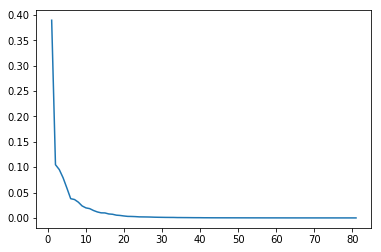

In [8]:
pca = PCA(n_components=81)
principalComponents = pca.fit_transform(X)
#pca.get_covariance()
#pca.explained_variance_
#pca.explained_variance_ratio_
#pca.explained_variance_ratio_.cumsum()
a=pca.explained_variance_ratio_
g=range(1,82)
plt.plot(g,a)
plt.show()

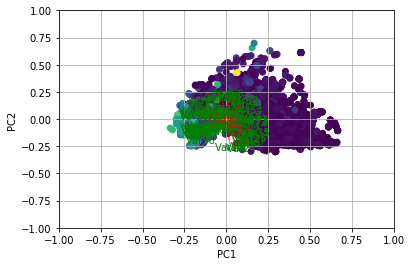

In [9]:
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [10]:
pca1 = PCA(.85)

principalComponents1 = pca1.fit_transform(X)
# To get how many principal components was chosen
n_components = pca1.n_components_
print("n_components = ",n_components)
pca2 = PCA(n_components)

principalComponents2 = pca2.fit_transform(X)

# to get how much variance was retained
print(pca2.explained_variance_ratio_.sum())

n_components =  9
0.8560395717537926


# For Full data

In [11]:
DTR = DecisionTreeRegressor()
DTR.fit (X,Y)
predicted_labels = DTR.predict(X)
var_score= explained_variance_score(predicted_labels, Y)
print("explained_variance_score = ", var_score)
abs_error = mean_absolute_error(predicted_labels, Y)
print("mean_absolute_error = ", abs_error)
rmse = mean_squared_error(predicted_labels, Y)
print("mean_squared_error = ", rmse)
r2 = r2_score(predicted_labels, Y) 
print("r2_score = ", r2)

explained_variance_score =  0.9839674582806059
mean_absolute_error =  1.397624816977604
mean_squared_error =  18.514249538204826
r2_score =  0.9839674582806059


# For PCA data

In [17]:
DTR1 = DecisionTreeRegressor()
DTR1.fit (principalComponents2,Y)
predicted_labels1 = DTR1.predict(principalComponents2)
var_score1= explained_variance_score(predicted_labels1, Y)
print("explained_variance_score = ", var_score1)
abs_error1 = mean_absolute_error(predicted_labels1, Y)
print("mean_absolute_error = ", abs_error1)
rmse1 = mean_squared_error(predicted_labels1, Y)
print("mean_squared_error = ", rmse1)
r21 = r2_score(predicted_labels1, Y) 
print("r2_score = ", r21)

explained_variance_score =  0.9839674582806059
mean_absolute_error =  1.3976248169776042
mean_squared_error =  18.514249538204826
r2_score =  0.9839674582806059


In [13]:
#X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y, test_size=0.2,random_state = 100)
#X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

In [14]:
#DTR = DecisionTreeRegressor()
#DTR.fit (X_Train,Y_Train)
#predicted_labels = DTR.predict(X_Test)
#var_score= explained_variance_score(predicted_labels, Y_Test)
#print("explained_variance_score = ", var_score)
#abs_error = mean_absolute_error(predicted_labels, Y_Test)
#print("mean_absolute_error = ", abs_error)
#rmse = mean_squared_error(predicted_labels, Y_Test)
#print("mean_squared_error = ", rmse)
#r2_score = r2_score(predicted_labels, Y_Test) 
#print("r2_score = ", r2_score)

In [15]:
#X_Train1, X_Test1, Y_Train1, Y_Test1= train_test_split(principalComponents2,Y, test_size=0.2,random_state = 100)
#X_Train1.shape, X_Test1.shape, Y_Train1.shape, Y_Test1.shape

In [16]:
#DTR1 = DecisionTreeRegressor()
#DTR1.fit (X_Train1,Y_Train1)
#predicted_labels1 = DTR1.predict(X_Test1)
#var_score1= explained_variance_score(predicted_labels1, Y_Test1)
#print("explained_variance_score = ", var_score1)
#abs_error1 = mean_absolute_error(predicted_labels1, Y_Test1)
#print("mean_absolute_error = ", abs_error1)
#rmse1 = mean_squared_error(predicted_labels1, Y_Test1)
#print("mean_squared_error = ", rmse1)
#r2_score1 = r2_score(predicted_labels1, np.array(Y_Test1)) 
#print("r2_score = ", r2_score1)